In [1]:
import pandas as pd
import os
import calendar
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

pd.options.display.float_format = '{:20,.2f}'.format

# Merging 12 months of sales data into a single file

In [2]:
df = pd.read_csv("./Data/Sales_April_2019.csv")


files = os.listdir("./Data")
all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Data/" + str(file))
    all_month_data = pd.concat([all_month_data,df])
    
all_month_data.to_csv("./all_data.csv",index = False)


# Updated dataframe

In [3]:
all_data = pd.read_csv("./all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up data

## Find NaN

There are some NaN values that are needed to be removed for further data processing

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


## Drop NaN

In [5]:
all_data = all_data.dropna(how = "all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Find "or"

In [6]:
temp_df = all_data[all_data["Order Date"].str[0:2]=="Or"]
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## Remove "or"

In [7]:
all_data = all_data[all_data["Order Date"].str[0:2]!= "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Convert Quantity Ordered and Price Each into proper int and Float

In [8]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

## Augment data

Adding some columns to process data further

### Add month Column

In [9]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data['Month Name'] = all_data['Month'].apply(lambda x: calendar.month_abbr[x])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Apr
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Apr


## Add Sales Column

In [10]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Apr,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99


### Add a city column

In [11]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + " " + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Apr,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99,Los Angeles CA


In [12]:
temp = all_data[all_data["Month"]== 12]
temp

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City
30394,295665,Macbook Pro Laptop,1,"1,700.00",12/30/19 00:01,"136 Church St, New York City, NY 10001",12,Dec,"1,700.00",New York City NY
30395,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,Dec,600.00,New York City NY
30396,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,Dec,11.95,New York City NY
30397,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,Dec,149.99,San Francisco CA
30398,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Dec,11.95,Atlanta GA
...,...,...,...,...,...,...,...,...,...,...
153029,293993,AAA Batteries (4-pack),1,2.99,12/01/19 00:41,"999 10th St, San Francisco, CA 94016",12,Dec,2.99,San Francisco CA
153134,294093,USB-C Charging Cable,1,11.95,12/01/19 00:37,"51 Cherry St, New York City, NY 10001",12,Dec,11.95,New York City NY
153499,294441,Wired Headphones,1,11.99,12/01/19 00:52,"469 Sunset St, San Francisco, CA 94016",12,Dec,11.99,San Francisco CA
153696,294629,Wired Headphones,1,11.99,12/01/19 01:54,"668 Ridge St, San Francisco, CA 94016",12,Dec,11.99,San Francisco CA


# Analysis

## Question 1: What was the best month for sales? How much was earned that month?

In [13]:
all_data.groupby(["Month","Month Name"],as_index = False)["Sales"].sum()

,Month,Month Name,Sales
0,1,Jan,"1,822,256.73"
1,2,Feb,"2,202,022.42"
2,3,Mar,"2,807,100.38"
3,4,Apr,"3,390,670.24"
4,5,May,"3,152,606.75"
5,6,Jun,"2,577,802.26"
6,7,Jul,"2,647,775.76"
7,8,Aug,"2,244,467.88"
8,9,Sep,"2,097,560.13"
9,10,Oct,"3,736,726.88"


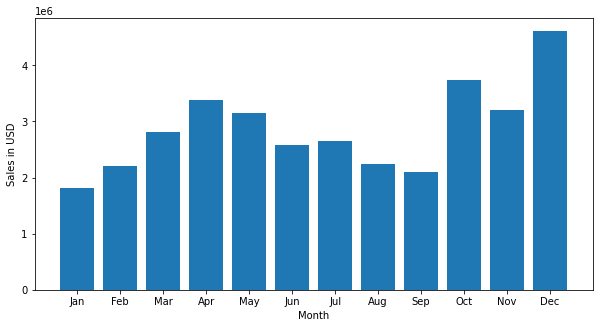

In [14]:
x = all_data.groupby(["Month","Month Name"],as_index = False)["Sales"].sum()["Month Name"]
y = all_data.groupby(["Month","Month Name"],as_index = False)["Sales"].sum()["Sales"]

plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.ylabel("Sales in USD")
plt.xlabel("Month")
plt.show()

##### From the graph above we can see that December was highest grossing month

### Question 2: What City had the highest number of Sales?

In [15]:
all_data.groupby(["City"],as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False).set_index("City")

,Sales
City,
San Francisco CA,"8,262,203.91"
Los Angeles CA,"5,452,570.80"
New York City NY,"4,664,317.43"
Boston MA,"3,661,642.01"
Atlanta GA,"2,795,498.58"
Dallas TX,"2,767,975.40"
Seattle WA,"2,747,755.48"
Portland OR,"1,870,732.34"
Austin TX,"1,819,581.75"


In [16]:
cities = all_data["City"].unique()
cities

array([' Dallas TX', ' Boston MA', ' Los Angeles CA', ' San Francisco CA',
       ' Seattle WA', ' Atlanta GA', ' New York City NY', ' Portland OR',
       ' Austin TX', ' Portland ME'], dtype=object)

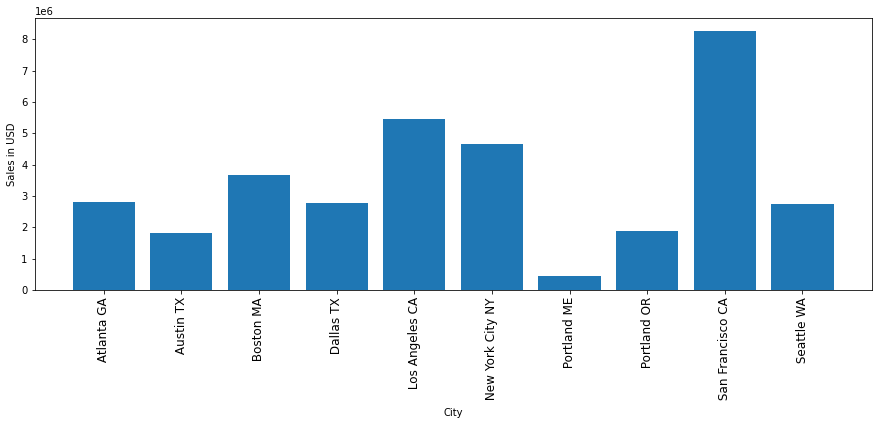

In [17]:
x = all_data.groupby(["City"],as_index = False).sum()["City"]
y = all_data.groupby(["City"],as_index = False).sum()["Sales"]

plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.xticks(x,rotation = "vertical", size = 12)
plt.ylabel("Sales in USD")
plt.xlabel("City")
plt.show()

#### From the graph above we can see that most sales occured in San Francisco

### Question 3: What is the best time for advertisement?

In [18]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99,Los Angeles CA


In [19]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99,Los Angeles CA,9,27


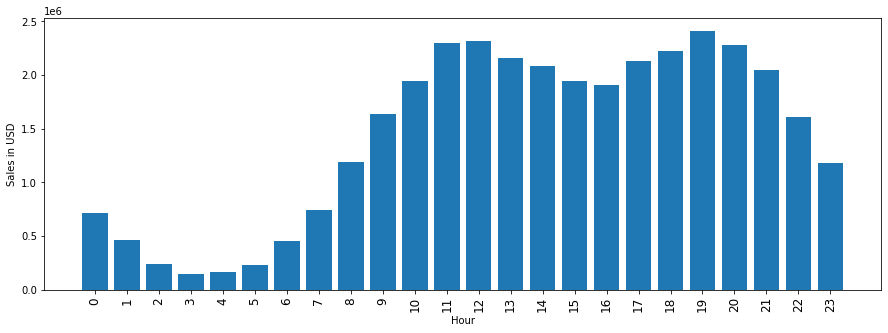

In [20]:
x = all_data.groupby(["Hour"],as_index = False).sum()["Hour"]
y = all_data.groupby(["Hour"],as_index = False).sum()["Sales"]

plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.xticks(x,rotation = "vertical", size = 12)
plt.ylabel("Sales in USD")
plt.xlabel("Hour")
plt.show()

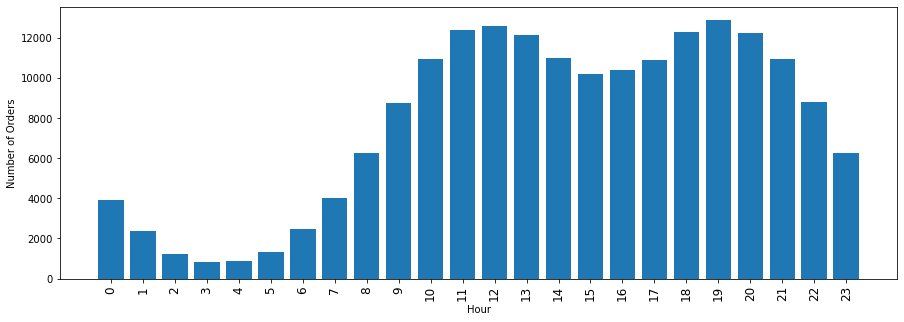

In [21]:
x = all_data.groupby(["Hour"],as_index = False).sum()["Hour"]
y = all_data.groupby(["Hour"],as_index = False).count()["Order ID"]

plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.xticks(x,rotation = "vertical", size = 12)
plt.ylabel("Number of Orders")
plt.xlabel("Hour")
plt.show()

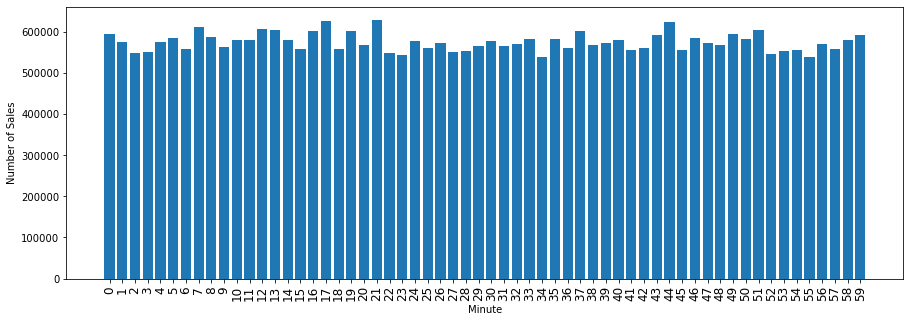

In [22]:
x = all_data.groupby(["Minute"],as_index = False).sum()["Minute"]
y = all_data.groupby(["Minute"],as_index = False).sum()["Sales"]

plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.xticks(x,rotation = "vertical", size = 12)
plt.ylabel("Number of Sales")
plt.xlabel("Minute")
plt.show()

#### From the graphs above we can see that the best time for advertisement is peaking around 12 pm and 7 pm, however it is steady across minutes distribution

### Question 4: What products are most often sold together?

In [23]:
df = pd.DataFrame.copy(all_data[all_data["Order ID"].duplicated(keep= False)])
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Apr,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Apr,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Apr,99.99,Boston MA,11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Apr,99.99,Boston MA,11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,Apr,5.98,San Francisco CA,17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,Apr,600.00,San Francisco CA,17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,Apr,14.95,New York City NY,11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,Apr,11.95,New York City NY,11,7


In [24]:
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [25]:
count = {}
for entry in df["Grouped"]:
    if entry in count.keys():
        count[entry] += 1
    else:
        count[entry] = 1
print(count.keys())

dict_keys(['Google Phone, Wired Headphones', 'Google Phone, USB-C Charging Cable', 'Bose SoundSport Headphones, Bose SoundSport Headphones', 'AAA Batteries (4-pack), Google Phone', 'Lightning Charging Cable, USB-C Charging Cable', 'Apple Airpods Headphones, ThinkPad Laptop', 'Bose SoundSport Headphones, AAA Batteries (4-pack)', '34in Ultrawide Monitor, Google Phone', 'iPhone, Lightning Charging Cable', 'Google Phone, Bose SoundSport Headphones, Wired Headphones', 'AAA Batteries (4-pack), 27in FHD Monitor', 'USB-C Charging Cable, AAA Batteries (4-pack)', 'iPhone, Wired Headphones', 'iPhone, 27in 4K Gaming Monitor', 'ThinkPad Laptop, AAA Batteries (4-pack)', 'iPhone, Apple Airpods Headphones, AAA Batteries (4-pack)', 'Wired Headphones, Apple Airpods Headphones', 'Macbook Pro Laptop, ThinkPad Laptop', 'AA Batteries (4-pack), Flatscreen TV', 'Vareebadd Phone, USB-C Charging Cable', 'USB-C Charging Cable, Lightning Charging Cable', 'Google Phone, AA Batteries (4-pack)', 'AA Batteries (4-pac

In [26]:
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(", ")
    count.update(Counter(combinations(row_list,2)))
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [27]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### Above is a list of products that are usually sold together 

### Question 5: What products are sold the most?

In [28]:
product_group = all_data.groupby("Product",as_index = False)
product_group.sum()

,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
0,20in Monitor,4129,"451,068.99",29336,"454,148.71",58764,122252
1,27in 4K Gaming Monitor,6244,"2,429,637.70",44440,"2,435,097.56",90916,184331
2,27in FHD Monitor,7550,"1,125,974.93",52558,"1,132,424.50",107540,219948
3,34in Ultrawide Monitor,6199,"2,348,718.19",43304,"2,355,558.01",89076,183480
4,AA Batteries (4-pack),27635,"79,015.68",145558,"106,118.40",298342,609039
5,AAA Batteries (4-pack),31017,"61,716.59",146370,"92,740.83",297332,612113
6,Apple Airpods Headphones,15661,"2,332,350.00",109477,"2,349,150.00",223304,455570
7,Bose SoundSport Headphones,13457,"1,332,366.75",94113,"1,345,565.43",192445,392603
8,Flatscreen TV,4819,"1,440,000.00",34224,"1,445,700.00",68815,142789
9,Google Phone,5532,"3,315,000.00",38305,"3,319,200.00",79479,162773


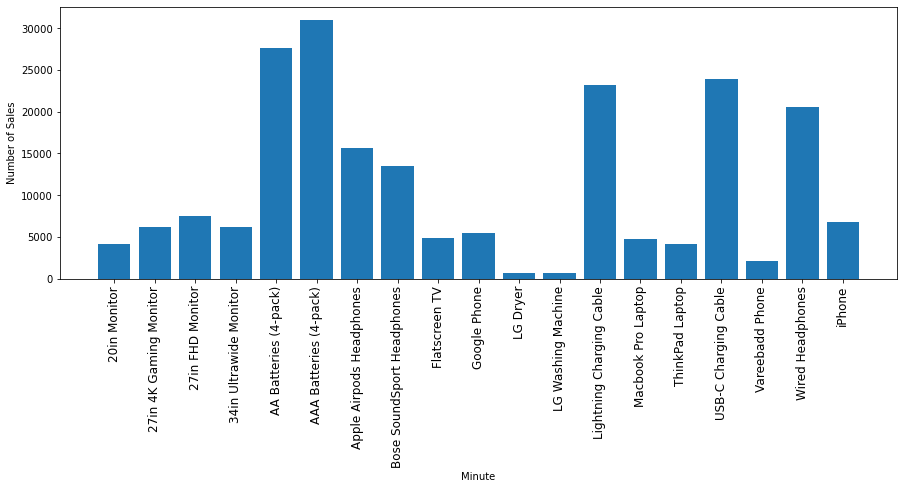

In [29]:
x = all_data.groupby("Product",as_index = False).sum()["Product"]
y = all_data.groupby("Product",as_index = False).sum()["Quantity Ordered"]

plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.xticks(x,rotation = "vertical", size = 12)
plt.ylabel("Number of Sales")
plt.xlabel("Minute")
plt.show()

In [30]:
sorted_group = product_group.sum().sort_values("Quantity Ordered").reset_index()
sorted_group["Price Each"] = sorted_group["Sales"] / sorted_group["Quantity Ordered"]
sorted_group

,index,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
0,10,LG Dryer,646,600.00,4383,"387,600.00",9326,19043
1,11,LG Washing Machine,666,600.00,4523,"399,600.00",9785,19462
2,16,Vareebadd Phone,2068,400.00,14309,"827,200.00",29472,61835
3,0,20in Monitor,4129,109.99,29336,"454,148.71",58764,122252
4,14,ThinkPad Laptop,4130,999.99,28950,"4,129,958.70",59746,121508
5,13,Macbook Pro Laptop,4728,"1,700.00",33548,"8,037,600.00",68261,137574
6,8,Flatscreen TV,4819,300.00,34224,"1,445,700.00",68815,142789
7,9,Google Phone,5532,600.00,38305,"3,319,200.00",79479,162773
8,3,34in Ultrawide Monitor,6199,379.99,43304,"2,355,558.01",89076,183480
9,1,27in 4K Gaming Monitor,6244,389.99,44440,"2,435,097.56",90916,184331


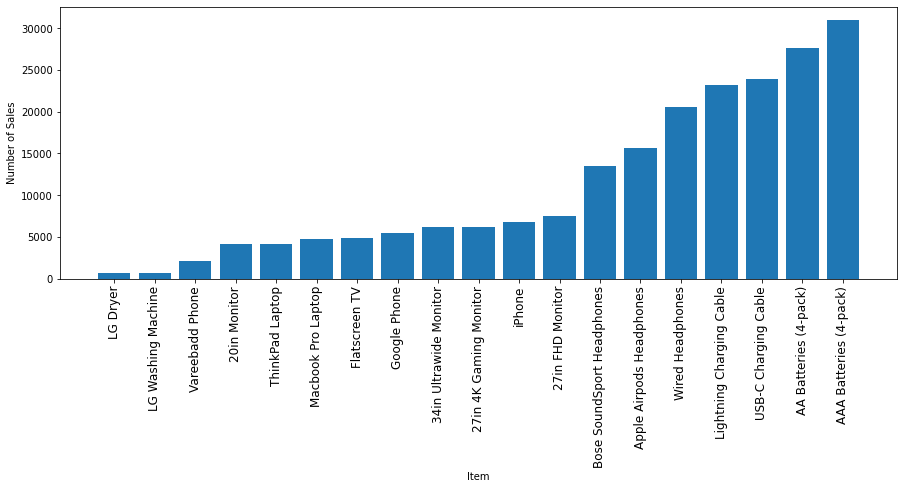

In [31]:
x = sorted_group["Product"]
y = sorted_group["Quantity Ordered"]
y2 = sorted_group["Price Each"]

plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.xticks(x,rotation = "vertical", size = 12)
plt.ylabel("Number of Sales")
plt.xlabel("Item")
plt.show()

#### Here we can see that the most sold item is AAA Batteries

<Figure size 7200x14400 with 0 Axes>

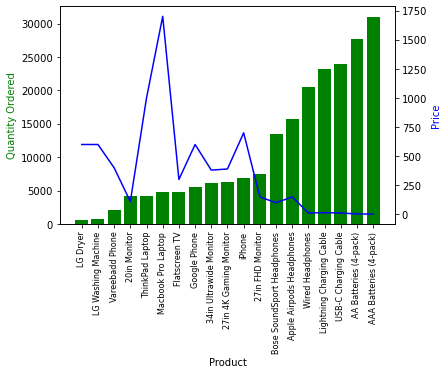

In [32]:
import numpy as np

x = np.array(sorted_group["Product"])
y = sorted_group["Quantity Ordered"]
y2 = sorted_group["Price Each"]

plt.figure(figsize=(100,200))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color = "g")
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel("Price", color='b')
ax1.set_xticklabels(x, rotation = "vertical", size = 8)


plt.show()



#### Graph above shows that most revenue comes from selling expensive electronics